<a href="https://colab.research.google.com/github/jaylee07/TF_udacity/blob/master/%5BUdacity%5Dch3_classifying_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install -U tensorflow_datasets

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

tf.logging.set_verbosity(tf.logging.ERROR)
tf.enable_eager_execution()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
dataset, metadata = tfds.load(name='fashion_mnist', as_supervised=True, with_info=True)

In [0]:
trn_dset, tst_dset = dataset['train'], dataset['test']

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
n_trn_dset = metadata.splits['train'].num_examples
n_tst_dset = metadata.splits['test'].num_examples
print(f"Number of training examples: {n_trn_dset}")
print(f"Number of test examples:     {n_tst_dset}")

Number of training examples: 60000
Number of test examples:     10000


## Image preprocessing
Normalize: Integer in [0, 255] --> Float in [0, 1]

In [0]:
def normalize(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255
  return image, label

In [0]:
trn_dset = trn_dset.map(normalize)
tst_dset = tst_dset.map(normalize)

In [0]:
for i, (image, label) in enumerate(tst_dset.take(1)):
  break

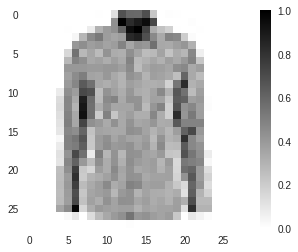

In [9]:
image = image.numpy().reshape([28,28])
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

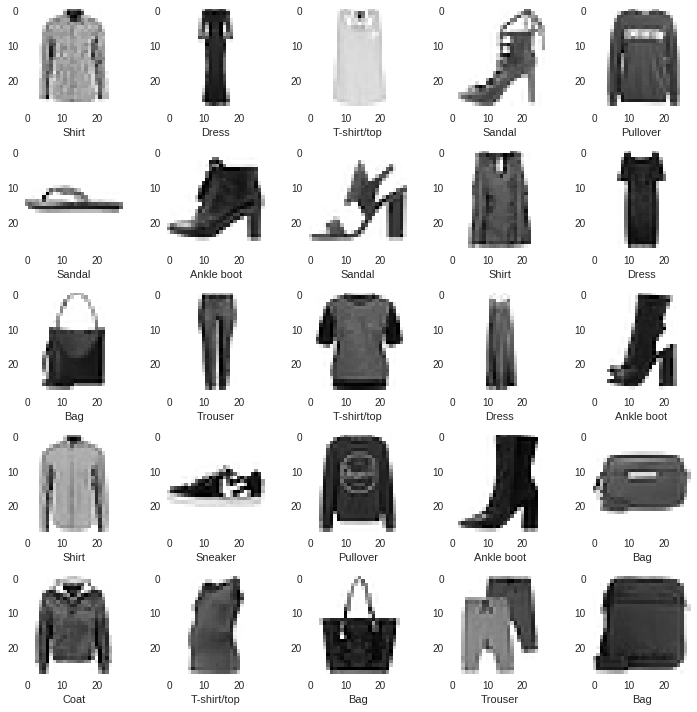

In [10]:
# plt.figure(figsize=(10,10))
fig, axes = plt.subplots(5, 5, figsize=(10,10))
plt.tight_layout()
for i, (image, label) in enumerate(tst_dset.take(25)):
  row, col = int(i/5), i%5
  image = image.numpy().reshape((28,28))
  axes[row, col].imshow(image, cmap = plt.cm.binary)
  axes[row, col].grid(False)
#   fig[row, col].xticks([])
#   fig[row, col].yticks([])
  axes[row, col].set_xlabel(class_names[label])

## Model Construction

In [0]:
flatten = tf.keras.layers.Flatten(input_shape=(28,28,1))
layer0 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
layer1 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
model = tf.keras.Sequential([flatten, layer0, layer1])

In [0]:
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 64
trn_dset = trn_dset.repeat().shuffle(n_trn_dset).batch(BATCH_SIZE)
tst_dset = tst_dset.batch(BATCH_SIZE)

In [14]:
model.fit(trn_dset, epochs = 5, steps_per_epoch=math.ceil(n_trn_dset/BATCH_SIZE))

Epoch 1/5
938/938 [==============================] - 24s 26ms/step - loss: 0.5135 - acc: 0.8219
Epoch 2/5
938/938 [==============================] - 14s 14ms/step - loss: 0.3817 - acc: 0.8640
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.3474 - acc: 0.8736
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3243 - acc: 0.8828
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3078 - acc: 0.8888


## Evaluation in test set

In [15]:
tst_loss, tst_acc = model.evaluate(tst_dset, steps = math.ceil(n_tst_dset/BATCH_SIZE))
print(f'tst_loss: {tst_acc:.4f}, tst_acc: {tst_acc:.4f}')

157/157 [==============================] - 2s 13ms/step - loss: 0.3576 - acc: 0.8731
tst_loss: 0.8731, tst_acc: 0.8731


## Make prediction and explore

In [0]:
for i, (image, label) in enumerate(tst_dset.take(1)):
  tst_image = image.numpy()
  tst_label = label.numpy()
  pred = model.predict(tst_image)

In [17]:
print(pred.shape)
print(pred[0])
print(np.argmax(pred[0]))
print(class_names[np.argmax(pred[0])])

(64, 10)
[9.9397723e-05 1.4694578e-07 2.1504641e-02 1.5569082e-04 1.0337656e-01
 3.0896609e-07 8.7481940e-01 2.4764391e-08 4.3771364e-05 1.6884661e-08]
6
Shirt


In [0]:
def plot_images(idx, pred_arrays, real_labels, images):
  pred_array, real_label, image = pred_arrays[idx], real_labels[idx], images[idx]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image[...,0], cmap=plt.cm.binary)
  pred_label = np.argmax(pred_array)
  if pred_label == real_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label],
                                       100*np.max(pred_array),
                                       class_names[real_label]),
             color=color)
  
def plot_value_array(idx, pred_arrays, real_labels):
  pred_array, real_label = pred_arrays[idx], real_labels[idx]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  value_plot = plt.bar(range(10), pred_array, color = '#777777')
  plt.ylim([0,1])
  pred_label = np.argmax(pred_array)
  value_plot[pred_label].set_color('red')
  value_plot[real_label].set_color('blue')

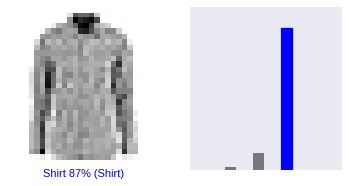

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, pred, tst_label, tst_image)
plt.subplot(1,2,2)
plot_value_array(i, pred,  tst_label)

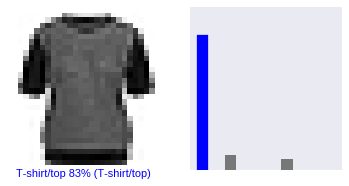

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, pred, tst_label, tst_image)
plt.subplot(1,2,2)
plot_value_array(i, pred,  tst_label)

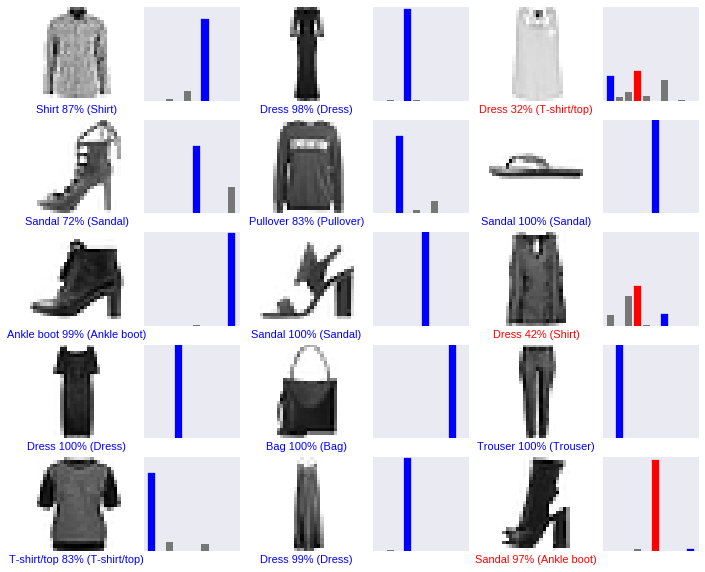

In [29]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_images(i, pred, tst_label, tst_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, tst_label)


In [30]:
# Grab an image from the test dataset
print(tst_image[0].shape)

(28, 28, 1)


In [31]:
img = np.array([tst_image[0]])
print(img.shape)

(1, 28, 28, 1)


In [33]:
pred_single = model.predict(img)
print(pred_single)
print(np.argmax(pred_single))

[[9.9397745e-05 1.4694567e-07 2.1504628e-02 1.5569100e-04 1.0337644e-01
  3.0896615e-07 8.7481958e-01 2.4764445e-08 4.3771415e-05 1.6884663e-08]]
6


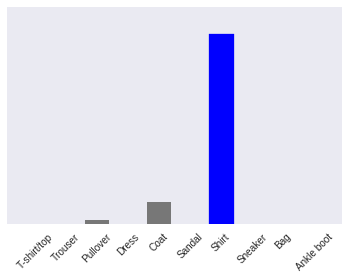

In [34]:
plot_value_array(0, pred_single, tst_label)
_ = plt.xticks(range(10), class_names, rotation=45)

# Exercises

Experiment with different models and see how the accuracy results differ. In particular change the following parameters:
*   Set training epochs set to 1
*   Number of neurons in the Dense layer following the Flatten one. For example, go really low (e.g. 10) in ranges up to 512 and see how accuracy changes
*   Add additional Dense layers between the Flatten and the final Dense(10,  activation=tf.nn.softmax), experiment with different units in these layers
*   Don't normalize the pixel values, and see the effect that has


In [37]:
NUM_EPOCHS = 1
units = [2**i for i in range(4, 10)]
for unit in units:
  flatten = tf.keras.layers.Flatten(input_shape=(28,28,1))
  layer_0 = tf.keras.layers.Dense(units=unit, activation = tf.nn.relu)
  layer_1 = tf.keras.layers.Dense(units=10, activation = tf.nn.softmax)
  model   = tf.keras.Sequential([flatten, layer_0, layer_1])
  model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
  model.fit(trn_dset, epochs = NUM_EPOCHS, steps_per_epoch=math.ceil(n_trn_dset/BATCH_SIZE))
  tst_loss, tst_acc = model.evaluate(tst_dset, steps = math.ceil(n_tst_dset/BATCH_SIZE))
  print(f'When {unit} units in hidden layer, tst_acc: {tst_acc:.4f}')

157/157 [==============================] - 2s 14ms/step - loss: 0.5057 - acc: 0.8255
When 16 units in hidden layer, tst_acc: 0.8255
157/157 [==============================] - 2s 14ms/step - loss: 0.4764 - acc: 0.8346
When 32 units in hidden layer, tst_acc: 0.8346
157/157 [==============================] - 2s 14ms/step - loss: 0.4794 - acc: 0.8307
When 64 units in hidden layer, tst_acc: 0.8307
157/157 [==============================] - 2s 14ms/step - loss: 0.4307 - acc: 0.8467
When 128 units in hidden layer, tst_acc: 0.8467
157/157 [==============================] - 2s 16ms/step - loss: 0.4282 - acc: 0.8449
When 256 units in hidden layer, tst_acc: 0.8449
157/157 [==============================] - 3s 17ms/step - loss: 0.4065 - acc: 0.8544
When 512 units in hidden layer, tst_acc: 0.8544


In [39]:
NUM_EPOCHS = 1
units = [128, 256]
for unit in units:
  flatten = tf.keras.layers.Flatten(input_shape=(28,28,1))
  layer_0 = tf.keras.layers.Dense(units=unit, activation = tf.nn.relu)
  layer_1 = tf.keras.layers.Dense(units=100, activation = tf.nn.relu)
  layer_2 = tf.keras.layers.Dense(units=10, activation = tf.nn.softmax)
  model   = tf.keras.Sequential([flatten, layer_0, layer_1, layer_2])
  model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
  model.fit(trn_dset, epochs = NUM_EPOCHS, steps_per_epoch=math.ceil(n_trn_dset/BATCH_SIZE))
  tst_loss, tst_acc = model.evaluate(tst_dset, steps = math.ceil(n_tst_dset/BATCH_SIZE))
  print(f'When {unit} units in hidden layer, tst_acc: {tst_acc:.4f}')

157/157 [==============================] - 2s 16ms/step - loss: 0.4148 - acc: 0.8523
When 128 units in hidden layer, tst_acc: 0.8523
157/157 [==============================] - 3s 17ms/step - loss: 0.4097 - acc: 0.8499
When 256 units in hidden layer, tst_acc: 0.8499


In [0]:
# def normalize2(image, label):
#   image = tf.cast(image, tf.float32)
#   return image, label
trn_dset, tst_dset = dataset['train'], dataset['test']
# trn_dset = trn_dset.map(normalize2)
# tst_dset = tst_dset.map(normalize2)
trn_dset = trn_dset.repeat().shuffle(n_trn_dset).batch(BATCH_SIZE)
tst_dset = tst_dset.batch(BATCH_SIZE)

In [0]:

n_trn_dset = metadata.splits['train'].num_examples
n_tst_dset = metadata.splits['test'].num_examples
flatten = tf.keras.layers.Flatten(input_shape=(28,28,1))
layer0 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
layer1 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
model = tf.keras.Sequential([flatten, layer0, layer1])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [52]:
model.fit(trn_dset, batch_size=BATCH_SIZE, epochs=5, steps_per_epoch=math.ceil(n_trn_dset/BATCH_SIZE))

Epoch 1/5
938/938 [==============================] - 23s 25ms/step - loss: 12.9152 - acc: 0.1986
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 12.9405 - acc: 0.1971
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 13.3309 - acc: 0.1729
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 14.5012 - acc: 0.1003
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 14.5227 - acc: 0.0990
